In [ ]:
from pyspark.sql import SparkSession 

spark = SparkSession.builder.appName("stocks_analysis").getOrCreate()

Amazon IAM user credentials for accessing S3 bucket and fetching data.

In [ ]:
access_key = 'enter access key'
secret_key = 'enter secret key'
sc._jsc.hadoopConfiguration().set("fs.s3a.access.key", access_key)
sc._jsc.hadoopConfiguration().set("fs.s3a.secret.key", secret_key)

# # If you are using Auto Loader file notification mode to load files, provide the AWS Region ID.
aws_region = "enter region"
sc._jsc.hadoopConfiguration().set("fs.s3a.endpoint", "s3." + aws_region + ".amazonaws.com")

df = spark.read.csv('source file loc in s3',header=True)
df.show()

+--------+------------+----------+----------------+----------------+---------------+-----------------+------------+---------------------+
|exchange|stock_symbol|      date|stock_price_open|stock_price_high|stock_price_low|stock_price_close|stock_volume|stock_price_adj_close|
+--------+------------+----------+----------------+----------------+---------------+-----------------+------------+---------------------+
|    NYSE|          XL|2010-02-08|           16.47|           16.85|          16.29|            16.51|     4793200|                16.51|
|    NYSE|          XL|2010-02-05|           16.38|           16.55|          15.91|            16.46|     4760900|                16.46|
|    NYSE|          XL|2010-02-04|           17.02|           17.02|          16.31|            16.41|     6716100|                16.41|
|    NYSE|          XL|2010-02-03|           17.25|           17.34|          17.09|            17.14|     2657900|                17.14|
|    NYSE|          XL|2010-02-02|

In [ ]:
df1=df.select('stock_symbol','stock_price_close')
df1.show()

+------------+-----------------+
|stock_symbol|stock_price_close|
+------------+-----------------+
|          XL|            16.51|
|          XL|            16.46|
|          XL|            16.41|
|          XL|            17.14|
|          XL|            17.33|
|          XL|            16.88|
|          XL|            16.77|
|          XL|            16.75|
|          XL|            16.99|
|          XL|            16.74|
|          XL|            16.74|
|          XL|            16.48|
|          XL|            17.34|
|          XL|            17.52|
|          XL|            17.61|
|          XL|            17.09|
|          XL|            17.46|
|          XL|            17.51|
|          XL|            17.36|
|          XL|            18.28|
+------------+-----------------+
only showing top 20 rows



In [ ]:
df1.printSchema()

root
 |-- stock_symbol: string (nullable = true)
 |-- stock_price_close: string (nullable = true)



In [ ]:
from pyspark.sql.functions import col

df1 = df1.withColumn("stock_price_close", col("stock_price_close").cast("double"))

In [ ]:
df2=df1.groupBy('stock_symbol').avg('stock_price_close')
df2.show()

+------------+----------------------+
|stock_symbol|avg(stock_price_close)|
+------------+----------------------+
|          XL|    56.548295916186134|
|         XOM|     62.07296581703227|
|         XKO|     10.38402179296681|
|         XVG|    23.665942126514114|
|         XRX|     48.55735065246069|
|         XEC|    36.738355150825264|
|         XKE|      7.97568252007413|
|         XJT|     7.585616368286435|
|         XFB|    24.577436069986575|
|         XCJ|    25.056438356164392|
|         XFR|     24.11657931034483|
|         XRM|     6.120193439865432|
|         XVF|     19.09675014560278|
|         XFD|    22.164567126725238|
|         XAA|     13.36183315038391|
|         XIN|     5.954456721915289|
|         XKK|     9.041530740276048|
|         XFJ|      24.3249372647427|
|         XFH|    23.749993726474262|
|         XFL|    25.636919698870724|
+------------+----------------------+
only showing top 20 rows



# Loading Data in S3 bucket in csv format

In [ ]:
df2.coalesce(1).write.csv('enter destination loc in s3')

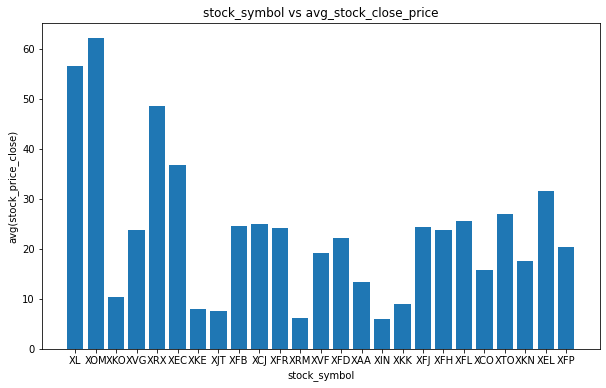

In [ ]:
import matplotlib.pyplot as plt

df_pandas = df2.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(df_pandas['stock_symbol'], df_pandas['avg(stock_price_close)'])
plt.title('stock_symbol vs avg_stock_close_price')
plt.xlabel('stock_symbol')
plt.ylabel('avg(stock_price_close)')
plt.show()

RDD 

In [ ]:
rdd1=sc.textFile('enter source file loc from s3')

In [ ]:
rdd1.take(2)

Out[30]: ['exchange,stock_symbol,date,stock_price_open,stock_price_high,stock_price_low,stock_price_close,stock_volume,stock_price_adj_close',
 'NYSE,XL,2010-02-08,16.47,16.85,16.29,16.51,4793200,16.51']

In [ ]:
r2=rdd1.map(lambda x:x.split(","))
header = r2.first()
r2 = r2.filter(lambda line : line != header)
r2.take(5)

Out[31]: [['NYSE',
  'XL',
  '2010-02-08',
  '16.47',
  '16.85',
  '16.29',
  '16.51',
  '4793200',
  '16.51'],
 ['NYSE',
  'XL',
  '2010-02-05',
  '16.38',
  '16.55',
  '15.91',
  '16.46',
  '4760900',
  '16.46'],
 ['NYSE',
  'XL',
  '2010-02-04',
  '17.02',
  '17.02',
  '16.31',
  '16.41',
  '6716100',
  '16.41'],
 ['NYSE',
  'XL',
  '2010-02-03',
  '17.25',
  '17.34',
  '17.09',
  '17.14',
  '2657900',
  '17.14'],
 ['NYSE',
  'XL',
  '2010-02-02',
  '16.93',
  '17.52',
  '16.80',
  '17.33',
  '4282200',
  '17.33']]

In [ ]:
r3=r2.flatMap(lambda x:[(x[1],float(x[3]))])

In [ ]:
r4=r3.map(lambda x: (x,1))
r4.take(10)

Out[33]: [(('XL', 16.47), 1),
 (('XL', 16.38), 1),
 (('XL', 17.02), 1),
 (('XL', 17.25), 1),
 (('XL', 16.93), 1),
 (('XL', 16.75), 1),
 (('XL', 16.92), 1),
 (('XL', 17.08), 1),
 (('XL', 16.74), 1),
 (('XL', 16.67), 1)]

In [ ]:
r5=r4.flatMap(lambda x:[(x[0][0],x[0][1])])
r5.take(5)
r6=r4.flatMap(lambda x:[(x[0][0],x[1])])

In [ ]:
r6.take(5)
r7=r6.reduceByKey(lambda x,y:x+y)
r7.take(5)

Out[35]: [('XL', 4677), ('XFJ', 1594), ('XVG', 1486), ('XFB', 1486), ('XOM', 10122)]

In [ ]:
r5=r5.reduceByKey(lambda x,y:x+y)
r5.take(2)

Out[36]: [('XL', 264517.55000000255), ('XFJ', 38749.61999999995)]

In [ ]:
r8=r5.join(r7)
r8.take(5)

Out[37]: [('XL', (264517.55000000255, 4677)),
 ('XFJ', (38749.61999999995, 1594)),
 ('XVG', (35153.10999999997, 1486)),
 ('XFB', (36502.420000000006, 1486)),
 ('XOM', (627964.2600000007, 10122))]

In [ ]:
r9=r8.flatMap(lambda x:[(x[0],(x[1][0]/x[1][1]))])

In [ ]:
r9.collect()

Out[44]: [('XL', 56.55709856745832),
 ('XFJ', 24.309673776662454),
 ('XVG', 23.65619784656795),
 ('XFB', 24.564212651413193),
 ('XOM', 62.0395435684648),
 ('XKN', 17.563757841907165),
 ('XVF', 19.091403610949303),
 ('XTO', 27.05285270205642),
 ('XEC', 36.74586795674443),
 ('XRX', 48.54142942655385),
 ('XFL', 25.62698243412795),
 ('XIN', 5.9897974217311205),
 ('XKE', 7.969505867819643),
 ('XRM', 6.129058031959629),
 ('XFD', 22.162634880803044),
 ('XFR', 24.110372413793105),
 ('XCO', 15.781898608349882),
 ('XJT', 7.6039744245524306),
 ('XAA', 13.357546652030676),
 ('XFP', 20.25485570890843),
 ('XKO', 10.384422981674085),
 ('XKK', 9.04223964868255),
 ('XFH', 23.726298619824316),
 ('XCJ', 25.07545988258317),
 ('XEL', 31.43924341034821)]

# Loading Data in S3 bucket 

In [ ]:
r9.coalesce(1).saveAsTextFile('enter destination loc from s3')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/databricks/python/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<command-884284684934165>", line 2, in <module>
    rdd_to_df=r9.toDf()
AttributeError: 'PipelinedRDD' object has no attribute 'toDf'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/databricks/python/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 1997, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/databricks/python/lib/python3.9/site-packages/IPython/core/ultratb.py", line 1112, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/databricks/python/lib/python3.9/site-packages/IPython/core/ultratb.py", line 1006, in structured_traceback
    return VerboseTB.structured_traceback(
  File "/databricks/python/lib/python3.9/site-packages/IPython